# Identify cause of excess dense water formation on the Weddell Sea continental shelf

In [1]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
import glob
import sys
import cmocean
sys.path.append('/home/users/birgal/')
from nemo_python_git.utils import rotate_vector

In [2]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
# exp_dir  = f'{base_dir}output/CESM2_t0_ens1011_monthly_3hwind_highresbias_efr020_monthlymulti_1920/'
# old_dir  = f'{base_dir}output/ERA5_1h_tune0_efr020/'
exp_dir  = f'{base_dir}output/CESM2_3hwind_1979_bugfix2/'
exp_dir2 = f'{base_dir}output/CESM2_3hwind_1979_ERA5_winds/'
old_dir  = f'{base_dir}output/ERA5_1h_tune0_efr020/'

In [54]:
year  = 1984
yearo = year
# xrange = slice(880,1150); yrange = slice(150,300);
xrange = slice(0,None); yrange = slice(0,None);
# xrange = slice(880,1300); yrange = slice(150,400);
dictionary = {'x_grid_T':'x','y_grid_T':'y', 'x_grid_T_inner':'x','y_grid_T_inner':'y'}
dsT  = xr.open_dataset(f'{exp_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc').rename(dictionary).isel(x=xrange, y=yrange)
dsTo = xr.open_dataset(f'{old_dir}files0/eANT025.L121_1m_{yearo}0101_{yearo}1231_grid_T_compressed.nc').rename(dictionary).isel(x=xrange, y=yrange)
dsi  = xr.open_dataset(f'{exp_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc').isel(x=xrange, y=yrange)
dsi2 = xr.open_dataset(f'{exp_dir2}files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc').isel(x=xrange, y=yrange)
dsio = xr.open_dataset(f'{old_dir}files0/eANT025.L121_1m_{yearo}0101_{yearo}1231_icemod_compressed.nc').isel(x=xrange, y=yrange)
dsw  = xr.open_dataset(f'{exp_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_grid_W.nc').isel(x=xrange, y=yrange).rename({'depthw':'deptht'})
mesh_mask = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze().isel(x=xrange, y=yrange).rename({'nav_lev':'deptht'})

In [57]:
def compare_sea_ice(dsi, dsi2, dsio, xrange=slice(0,None), yrange=slice(0,None), title=''):

    var = 'sfxice' #sivolu
    
    dsi  = dsi.isel(x=xrange, y=yrange)
    dsi2  = dsi2.isel(x=xrange, y=yrange)
    dsio = dsio.isel(x=xrange, y=yrange)

    fig, ax = plt.subplots(1,3,figsize=(20,4))
    (dsi.area*dsi[var]).sum(dim=['x','y']).plot(ax=ax[0], label='CESM2')
    # (dsi2.area*dsi2.sivolu).sum(dim=['x','y']).plot(ax=ax[0], label='CESM2 ERA5 winds')
    (dsio.area*dsio[var]).sum(dim=['x','y']).plot(ax=ax[0], label='ERA5')
    ax[0].legend()
    ax[0].set_title('Sea ice salt flux sum (kg/s)')
    
    (dsi.sithic).mean(dim=['x','y']).plot(ax=ax[1], label='CESM2')
    # (dsi2.sithic).mean(dim=['x','y']).plot(ax=ax[1], label='CESM2 ERA5 winds')
    (dsio.sithic).mean(dim=['x','y']).plot(ax=ax[1], label='ERA5')
    ax[1].legend()
    ax[1].set_title('Mean sea ice thickness')

    (dsi.area*dsi.siconc).sum(dim=['x','y']).plot(ax=ax[2], label='CESM2')
    # (dsi2.area*dsi2.siconc).sum(dim=['x','y']).plot(ax=ax[2], label='CESM2 ERA5 winds')
    (dsio.area*dsio.siconc).sum(dim=['x','y']).plot(ax=ax[2], label='ERA5')
    ax[2].legend()
    ax[2].set_title('Sea ice area')
    
    fig.suptitle(title)
    
    return fig

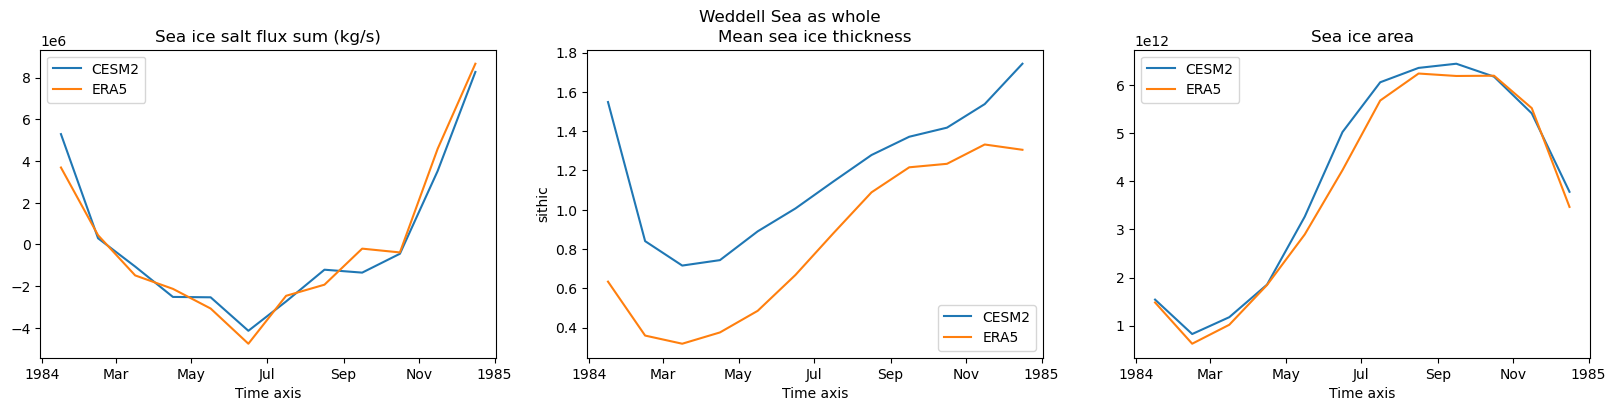

In [58]:
fig = compare_sea_ice(dsi, dsi2, dsio, xrange=slice(880,1300), yrange=slice(150,400), title='Weddell Sea as whole')

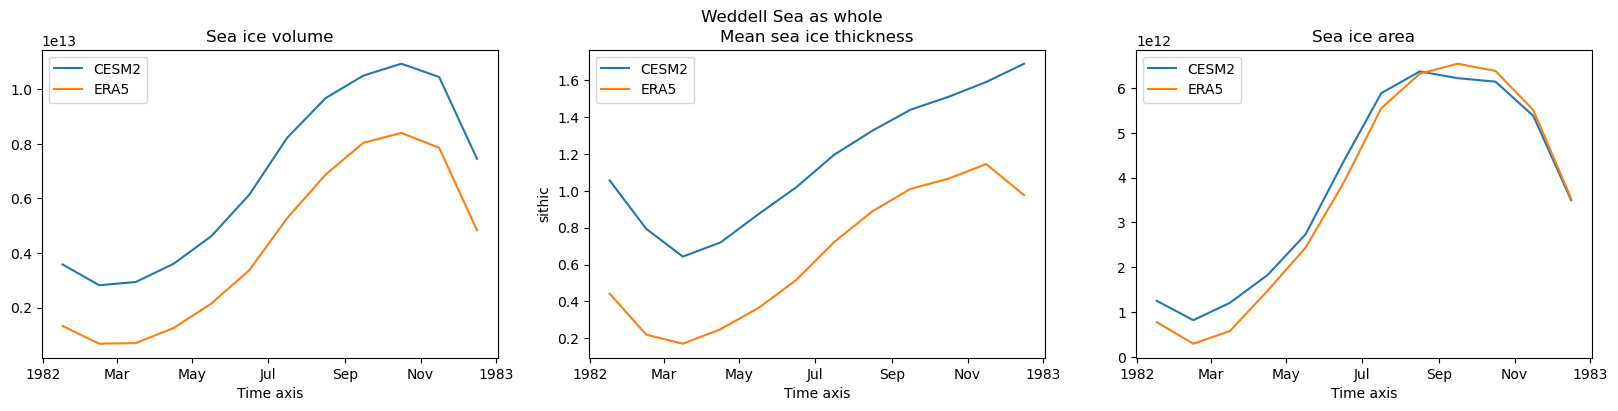

In [40]:
fig = compare_sea_ice(dsi, dsi2, dsio, xrange=slice(880,1300), yrange=slice(150,400), title='Weddell Sea as whole')

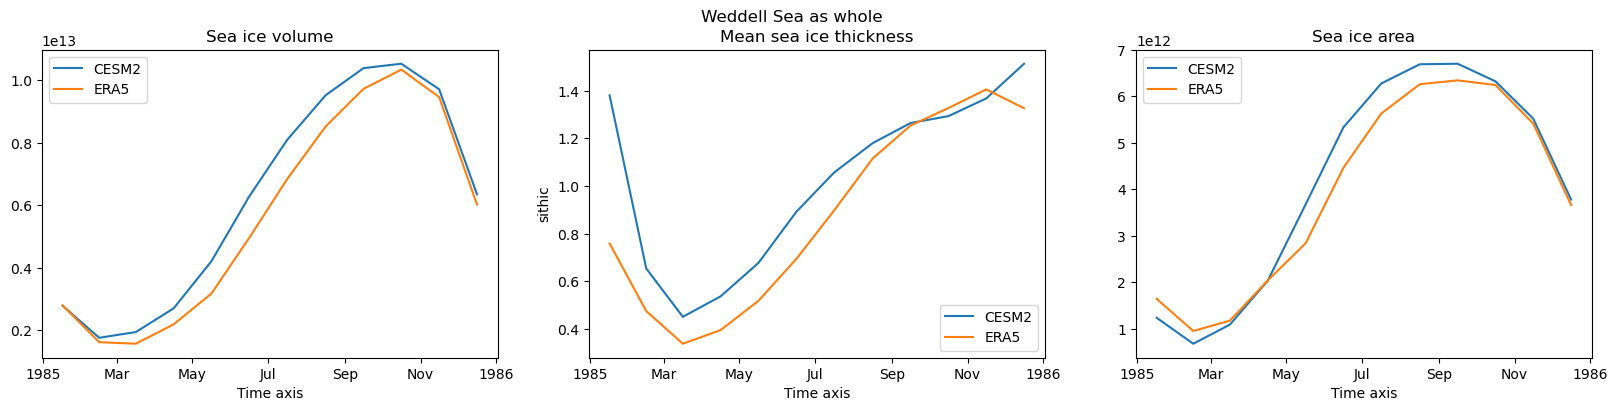

In [36]:
fig = compare_sea_ice(dsi, dsi2, dsio, xrange=slice(880,1300), yrange=slice(150,400), title='Weddell Sea as whole')

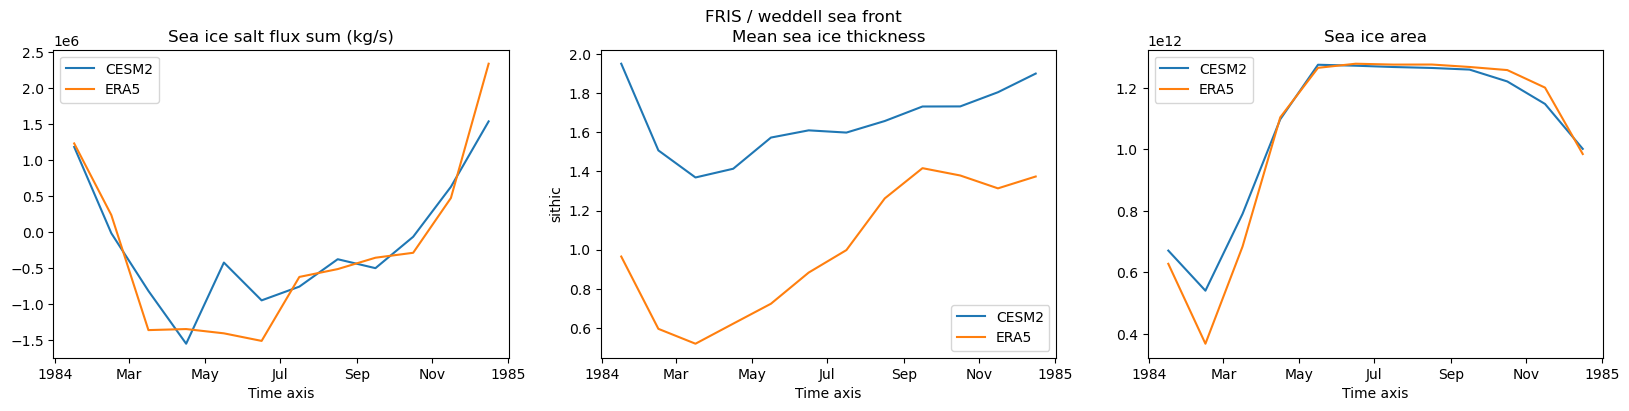

In [59]:
fig = compare_sea_ice(dsi, dsi2, dsio, xrange=slice(880,1150), yrange=slice(150,300), title='FRIS / weddell sea front')

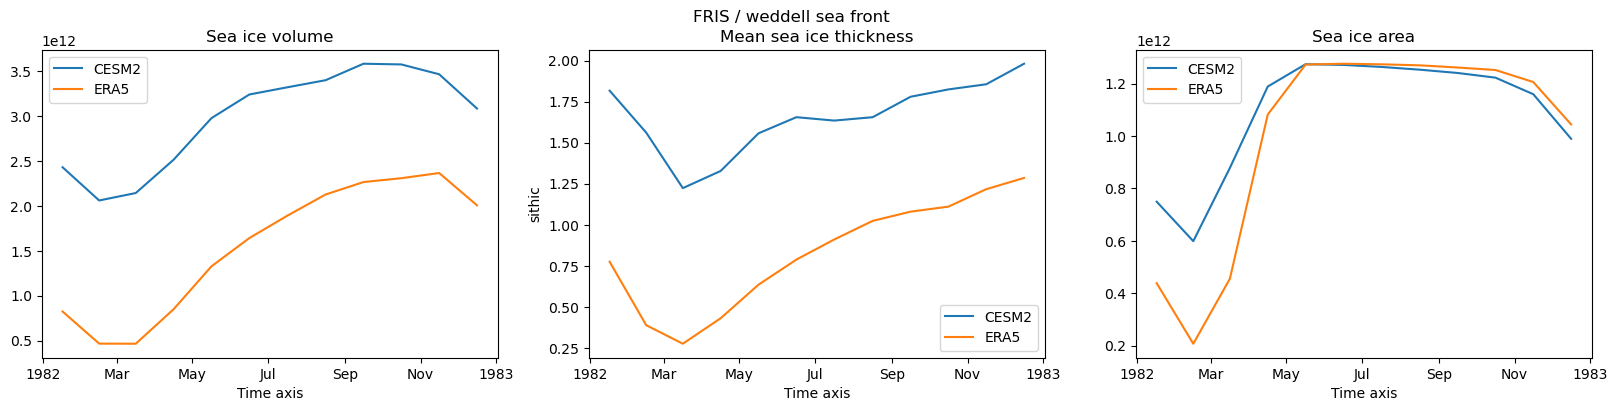

In [41]:
fig = compare_sea_ice(dsi, dsi2, dsio, xrange=slice(880,1150), yrange=slice(150,300), title='FRIS / weddell sea front')

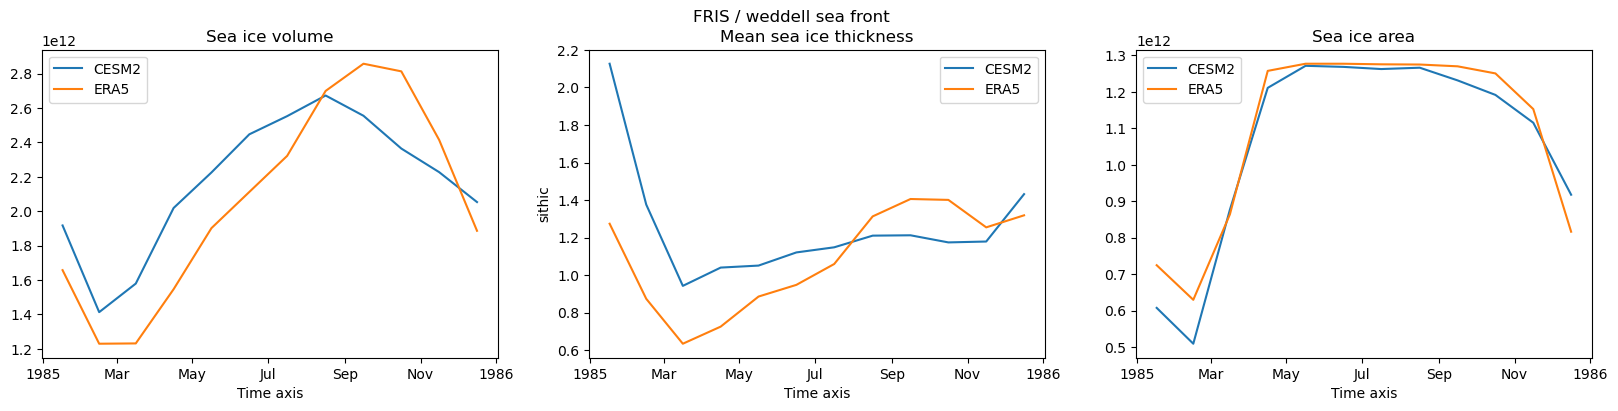

In [37]:
fig = compare_sea_ice(dsi, dsi2, dsio, xrange=slice(880,1150), yrange=slice(150,300), title='FRIS / weddell sea front')

Have a look at vertical profiles in the ocean basin

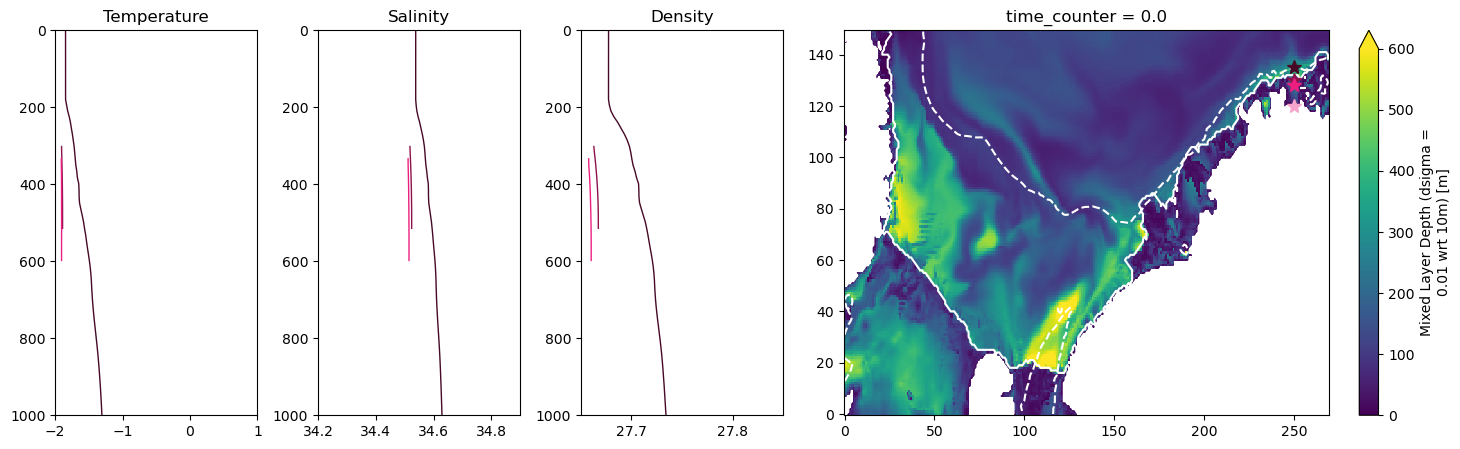

In [5]:
month= 5
# xlocs  = [90, 70, 58, 50]
# ylocs  = [130, 120, 112, 100]
xlocs  = [250, 250, 250, 250]
ylocs  = [135, 130, 128, 120]
colors = ['#460926', '#8d124c', '#ec1f80', '#f7a5cc']
fig, ax = plt.subplots(1,4,figsize=(18,5),gridspec_kw={'width_ratios': [1, 1, 1, 3]})
kwags1 = {'xlim':(-2,1)     , 'ylim':(1000,0), 'linewidth':1, 'y':'deptht', 'ax':ax[0]}
kwags2 = {'xlim':(34.2,34.9), 'ylim':(1000,0), 'linewidth':1, 'y':'deptht', 'ax':ax[1]}
kwags3 = {'xlim':(27.65, 27.85), 'ylim':(1000,0), 'linewidth':1, 'y':'deptht', 'ax':ax[2]}

# mixed layer depth plot
dsT.mldr10_1.isel(time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[3], vmin=0, vmax=600)
xr.plot.contour(mesh_mask.bathy_metry, ax=ax[3], levels=[1000], colors='w', linestyles='--')
xr.plot.contour(mesh_mask.misf, ax=ax[3], levels=[1], colors='w', linestyles='-')
for month in range(month, month+1):
    # profiles
    for c, color in enumerate(colors):
        T_profile = dsT.thetao.isel(time_counter=month,x=xlocs[c],y=ylocs[c]).where(mesh_mask.tmask.isel(x=xlocs[c],y=ylocs[c])!=0)
        S_profile = dsT.so.isel(time_counter=month,x=xlocs[c],y=ylocs[c]).where(mesh_mask.tmask.isel(x=xlocs[c],y=ylocs[c])!=0)
        rho       = gsw.density.sigma0(S_profile, T_profile)
        T_profile.plot(color=color, **kwags1)
        S_profile.plot(color=color, **kwags2)
        rho.plot(color=color, **kwags3)
        ax[3].plot([xlocs[c]],[ylocs[c]],'*',color=color, markersize=10)

ax[0].set_title('Temperature')
ax[1].set_title('Salinity')
ax[2].set_title('Density')
for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');

In [ ]:
xind=60

for year in range(1990,2010):
    xrange = slice(880,1150); yrange = slice(150,300);
    dictionary = {'x_grid_T':'x','y_grid_T':'y', 'x_grid_T_inner':'x','y_grid_T_inner':'y'}
    dsT  = xr.open_dataset(f'{old_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_grid_T_compressed.nc').rename(dictionary).isel(x=xrange, y=yrange)
    dsi  = xr.open_dataset(f'{old_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_icemod_compressed.nc').isel(x=xrange, y=yrange)
    dsw  = xr.open_dataset(f'{old_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_grid_W_compressed.nc').isel(x=xrange, y=yrange).rename({'depthw':'deptht'})
    mesh_mask = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze().isel(x=xrange, y=yrange).rename({'nav_lev':'deptht'})
    for month in range(0,12):
        fig, ax = plt.subplots(3,3, figsize=(20,12))
        dsT.mldr10_1.isel(time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[0,0], vmin=0   , vmax=600)
        dsT.sbs.isel(   time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[0,1]  , vmin=34.6, vmax=34.9)
        dsT.sbt.isel(   time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[0,2]  , vmin=-2.5, vmax=-1)
        dsi.siconc.isel(time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[1,0]  , vmin=0   , vmax=0.8)
        dsT.sosss.isel( time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[1,1]  , vmin=33  , vmax=34.9)
        dsT.sosst.isel( time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[1,2]  , vmin=-2  , vmax=2)
        # dsw.difvho.isel(time_counter=month,x=60).plot(ax=ax[2,0], vmin=0, vmax=0.8, ylim=(1000,0))
        dsw.bn2.isel(   time_counter=month,x=xind).where(mesh_mask.tmask.isel(x=xind).values!=0).plot(ax=ax[2,0], vmin=0, vmax=1e-5, ylim=(1000,0))
        dsT.so.isel(    time_counter=month,x=xind).where(mesh_mask.tmask.isel(x=xind).values!=0).plot(ax=ax[2,1], vmin=34.6, vmax=34.9, ylim=(1000,0))
        dsT.thetao.isel(time_counter=month,x=xind).where(mesh_mask.tmask.isel(x=xind).values!=0).plot(ax=ax[2,2], vmin=-2.5, vmax=-1, ylim=(1000,0))
    
        for a, axis in enumerate(ax.ravel()):
            if a < 6:
                axis.plot([xind,xind],[0,150],'-r')
                xr.plot.contour(mesh_mask.bathy_metry, ax=axis, levels=[1000], colors='w', linestyles='--')
                xr.plot.contour(mesh_mask.misf, ax=axis, levels=[1], colors='w', linestyles='-')
            axis.set_xlabel(''); axis.set_ylabel('');
            axis.set_title(f'y{year}m{month+1:02}')

        fig.savefig(f'{base_dir}figures/ERA5_Weddell_sea_y{year}m{month+1:02}.png')

In [ ]:
xind=60

for year in range(1920, 1930):
    xrange = slice(880,1150); yrange = slice(150,300);
    dictionary = {'x_grid_T':'x','y_grid_T':'y', 'x_grid_T_inner':'x','y_grid_T_inner':'y'}
    dsT  = xr.open_dataset(f'{exp_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc').rename(dictionary).isel(x=xrange, y=yrange)
    dsi  = xr.open_dataset(f'{exp_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc').isel(x=xrange, y=yrange)
    dsw  = xr.open_dataset(f'{exp_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_grid_W.nc').isel(x=xrange, y=yrange).rename({'depthw':'deptht'})
    mesh_mask = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze().isel(x=xrange, y=yrange).rename({'nav_lev':'deptht'})
    for month in range(0,12):
        fig, ax = plt.subplots(3,3, figsize=(20,12))
        dsT.mldr10_1.isel(time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[0,0], vmin=0   , vmax=600)
        dsT.sbs.isel(   time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[0,1]  , vmin=34.6, vmax=34.9)
        dsT.sbt.isel(   time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[0,2]  , vmin=-2.5, vmax=-1)
        dsi.siconc.isel(time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[1,0]  , vmin=0   , vmax=0.8)
        dsT.sosss.isel( time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[1,1]  , vmin=33  , vmax=34.9)
        dsT.sosst.isel( time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[1,2]  , vmin=-2  , vmax=2)
        # dsw.difvho.isel(time_counter=month,x=60).plot(ax=ax[2,0], vmin=0, vmax=0.8, ylim=(1000,0))
        dsw.bn2.isel(   time_counter=month,x=xind).where(mesh_mask.tmask.isel(x=xind).values!=0).plot(ax=ax[2,0], vmin=0, vmax=1e-5, ylim=(1000,0))
        dsT.so.isel(    time_counter=month,x=xind).where(mesh_mask.tmask.isel(x=xind).values!=0).plot(ax=ax[2,1], vmin=34.6, vmax=34.9, ylim=(1000,0))
        dsT.thetao.isel(time_counter=month,x=xind).where(mesh_mask.tmask.isel(x=xind).values!=0).plot(ax=ax[2,2], vmin=-2.5, vmax=-1, ylim=(1000,0))
    
        for a, axis in enumerate(ax.ravel()):
            if a < 6:
                axis.plot([xind,xind],[0,150],'-r')
                xr.plot.contour(mesh_mask.bathy_metry, ax=axis, levels=[1000], colors='w', linestyles='--')
                xr.plot.contour(mesh_mask.misf, ax=axis, levels=[1], colors='w', linestyles='-')
            axis.set_xlabel(''); axis.set_ylabel('');
            axis.set_title(f'y{year}m{month+1:02}')

        fig.savefig(f'{base_dir}figures/Weddell_sea_y{year}m{month+1:02}.png')

In [ ]:
# exp_dir  = f'{base_dir}output/CESM2_t0_ens1011_monthly_3hwind_highresbias_efr005_monthlymulti_1920/'
exp_dir  = f'{base_dir}output/ERA5_1h_tune0_efr020/'
# for year in range(1920, 1928):
for year in range(1979, 1990):
    
    dsT  = xr.open_dataset(f'{exp_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_grid_T_compressed.nc').rename(dictionary).isel(x=xrange, y=yrange)
    rho_slice = gsw.density.sigma0(dsT.so.isel(x=70), dsT.thetao.isel(x=70))
    rho_slice.attrs['long_name'] = 'density'
    rho_slice.attrs['units'] = ''
    
    # look at a transect from the ice shelf out to the ocean:
    fig, ax = plt.subplots(4,3, figsize=(20,16))
    kwags = {'vmin':27.5, 'vmax':27.9}
    axes = ax.ravel()
    for t, time in enumerate(range(0,12)):
        rho_slice.isel(time_counter=time).where(mesh_mask.tmask.isel(x=70)!=0).plot(ax=axes[t], **kwags)
        xr.plot.contour(rho_slice.isel(time_counter=time), ax=axes[t], levels=np.arange(27.6, 27.95, 0.05), colors='w', linestyles='-')
        axes[t].set_xlabel(''); axes[t].set_ylabel('')
        axes[t].set_ylim(1400,0); axes[t].set_xlim(15,140);
        axes[t].set_title(f'y{rho_slice.time_counter[t].dt.year.values}m{rho_slice.time_counter[t].dt.month.values:02}')
        
    fig.savefig(f'{exp_dir}figures0/rho_transect_Weddell_y{year}.jpg')

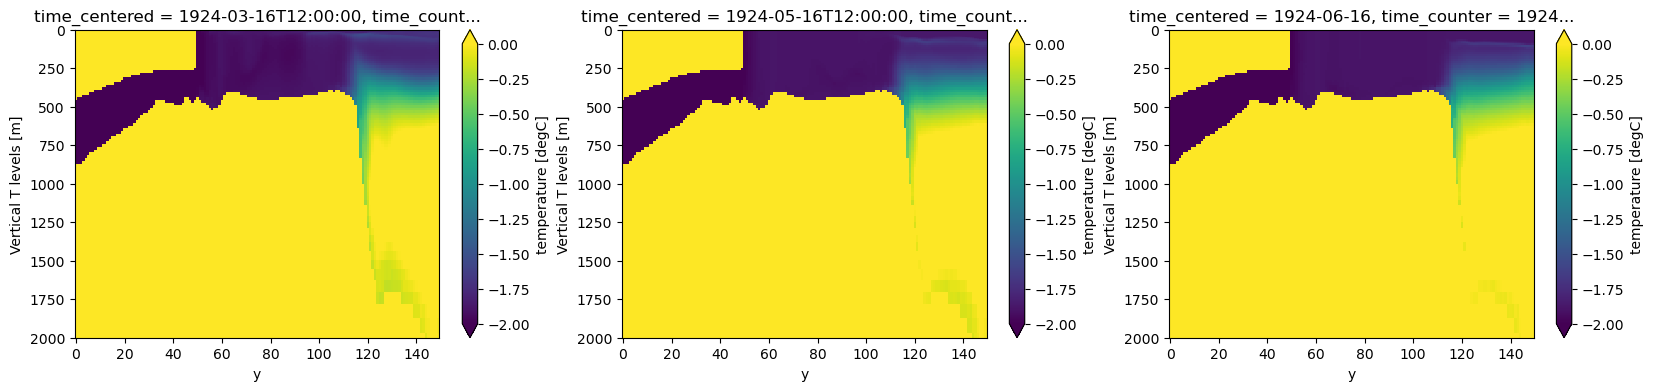

In [91]:
# look at a transect from the ice shelf out to the ocean:
fig, ax = plt.subplots(1,3, figsize=(20,4))
dsT.thetao.isel(time_counter=2, x=70).plot(ax=ax[0], ylim=(2000, 0), vmin=-2, vmax=0)
dsT.thetao.isel(time_counter=4, x=70).plot(ax=ax[1], ylim=(2000, 0), vmin=-2, vmax=0)
dsT.thetao.isel(time_counter=5, x=70).plot(ax=ax[2], ylim=(2000, 0), vmin=-2, vmax=0)

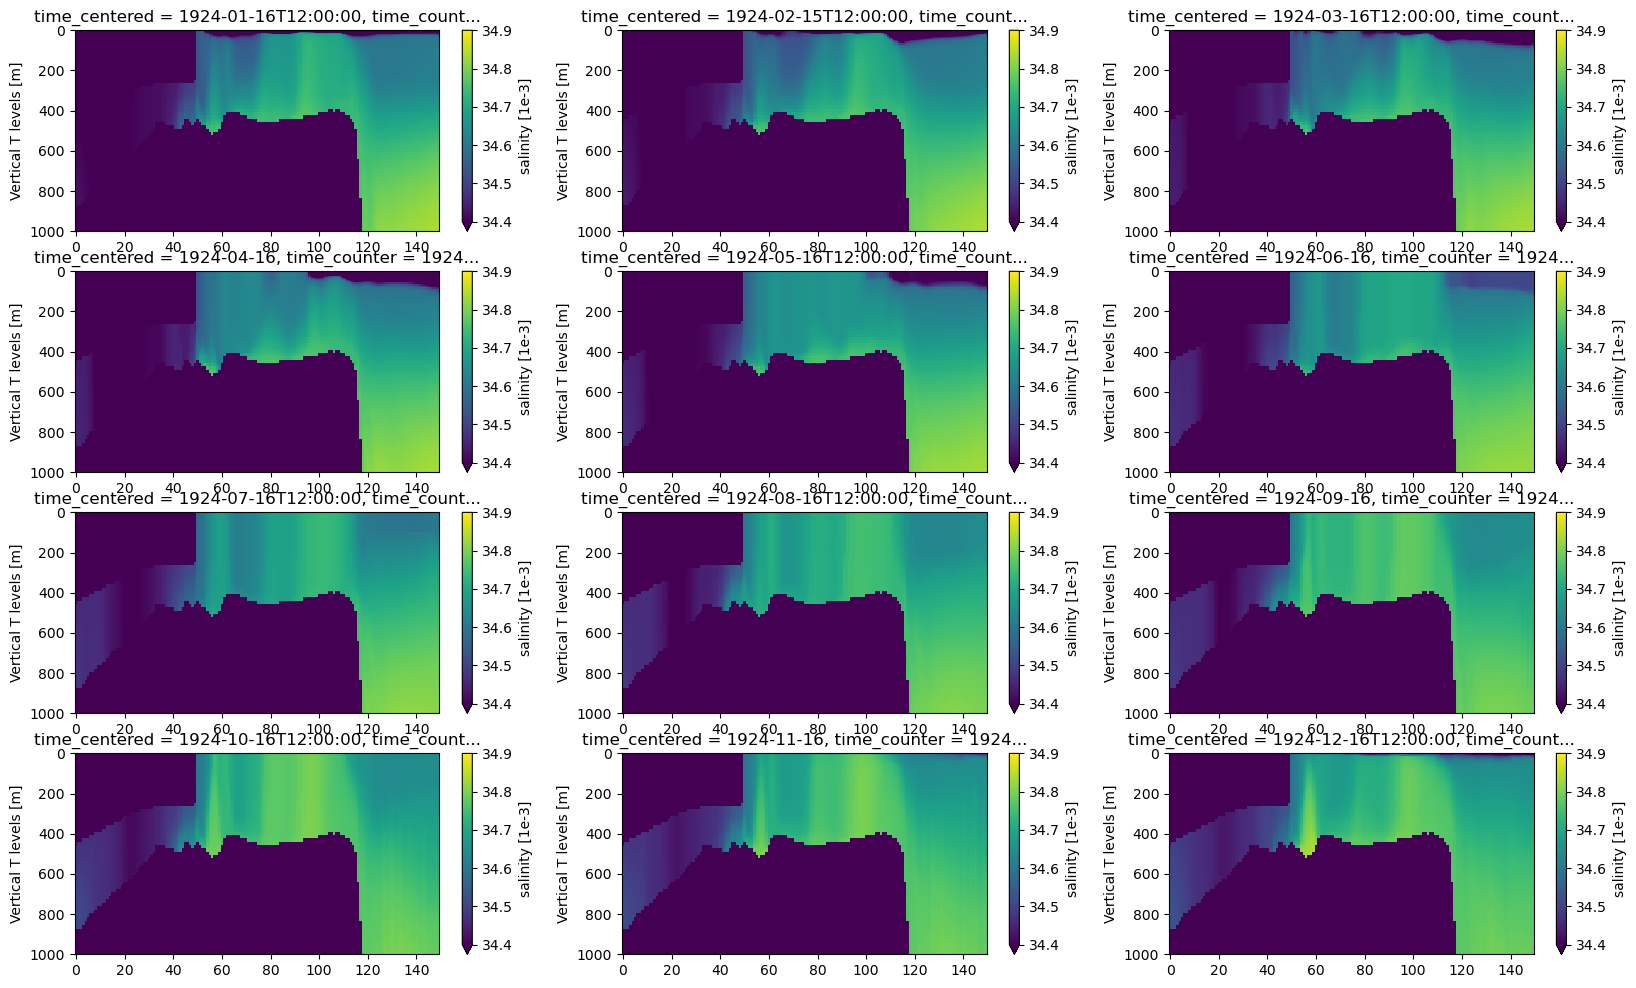

In [94]:
# look at a transect from the ice shelf out to the ocean:
kwags={'vmin':34.4, 'vmax':34.9}
fig, ax = plt.subplots(4,3, figsize=(20,12))
for a, axis in enumerate(ax.ravel()):
    dsT.so.isel(time_counter=a, x=70).plot(ax=axis, ylim=(1000, 0), **kwags)
    axis.set_xlabel('')

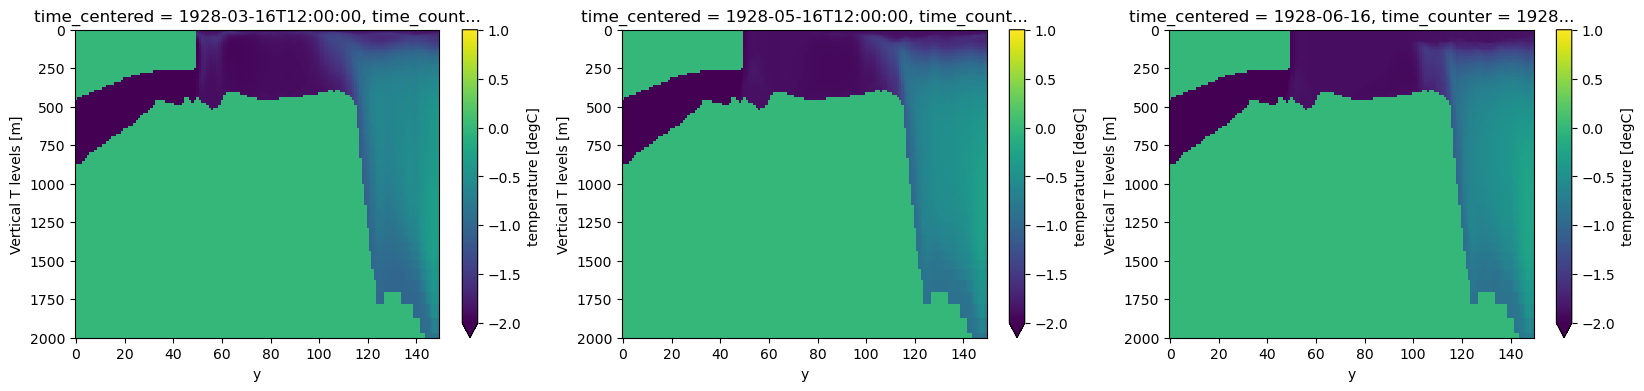

In [97]:
# look at a transect from the ice shelf out to the ocean:
fig, ax = plt.subplots(1,3, figsize=(20,4))
dsT.thetao.isel(time_counter=2, x=70).plot(ax=ax[0], ylim=(2000, 0), vmin=-2, vmax=1)
dsT.thetao.isel(time_counter=4, x=70).plot(ax=ax[1], ylim=(2000, 0), vmin=-2, vmax=1)
dsT.thetao.isel(time_counter=5, x=70).plot(ax=ax[2], ylim=(2000, 0), vmin=-2, vmax=1)

In [11]:
base_dir1 = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/'
year=1925
ds_era = xr.open_dataset(f'{base_dir1}ERA5_1h_tune0_efr020/files0/eANT025.L121_1m_19850101_19851231_icemod_compressed.nc')
ds_ref = xr.open_dataset(f'{base_dir1}CESM2_t0_ens1011_monthly_3hwind_highresbias_efr005_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod_compressed.nc')
ds_PSL = xr.open_dataset(f'{base_dir1}CESM2_t0_ens1011_monthly_3hwind_highresbias_ERA5_PSL_efr020_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod_compressed.nc')
ds_ppt = xr.open_dataset(f'{base_dir1}CESM2_t0_ens1011_monthly_3hwind_highresbias_ERA5_precip_efr020_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
ds_wnd = xr.open_dataset(f'{base_dir1}CESM2_t0_ens1011_monthly_3hwind_highresbias_ERA5_winds_efr020_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
ds_rad = xr.open_dataset(f'{base_dir1}CESM2_t0_ens1011_monthly_3hwind_highresbias_ERA5_radT_efr020_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod_compressed.nc')
# ds_cio = xr.open_dataset(f'{base_dir1}CESM2_t0_ens1011_monthly_3hwind_anglecorr_efr020_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
ds_mth = xr.open_dataset(f'{base_dir1}CESM2_t0_ens1011_monthly_3hwind_highresbias_efr020_monthlymulti_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
ds_amax  = xr.open_dataset(f'{base_dir1}CESM2_3hwind_amax_096_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
ds_rnf = xr.open_dataset(f'{base_dir1}CESM2_3hwind_runoff_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
ds_ssr = xr.open_dataset(f'{base_dir1}CESM2_3hwind_ssr_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')

In [4]:
year = 1933
ds_angle  = xr.open_dataset(f'{base_dir}output/CESM2_t0_ens1011_monthly_3hwind_anglecorr_efr020_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
ds_angle2 = xr.open_dataset(f'{base_dir}output/CESM2_t0_ens1011_monthly_3hwind_anglecorr_scaled_down_1930/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
ds_hammer = xr.open_dataset(f'{base_dir}output/CESM2_t0_ens1011_monthly_3hwind_allhammers_efr005_1920/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')

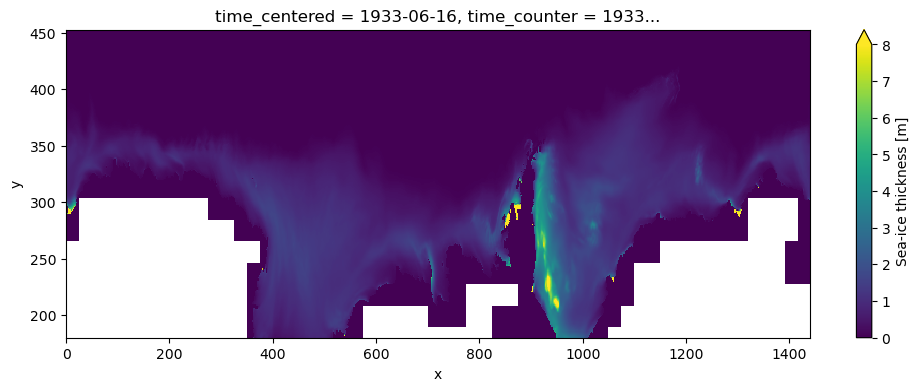

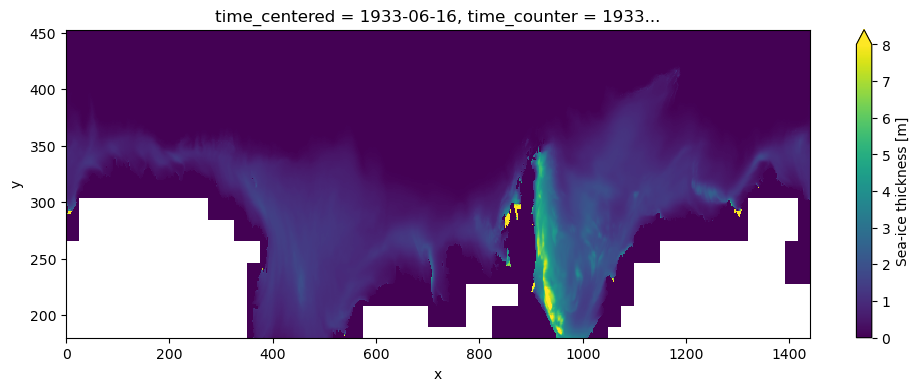

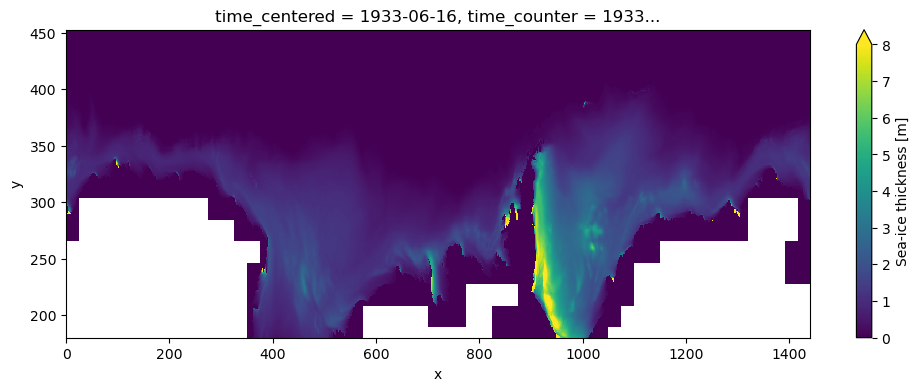

In [7]:
ds_angle['sithic'].isel(time_counter=5).plot(figsize=(12,4), vmin=0, vmax=8, ylim=(180,None))
ds_angle2['sithic'].isel(time_counter=5).plot(figsize=(12,4), vmin=0, vmax=8, ylim=(180,None))
ds_hammer['sithic'].isel(time_counter=5).plot(figsize=(12,4), vmin=0, vmax=8, ylim=(180,None))

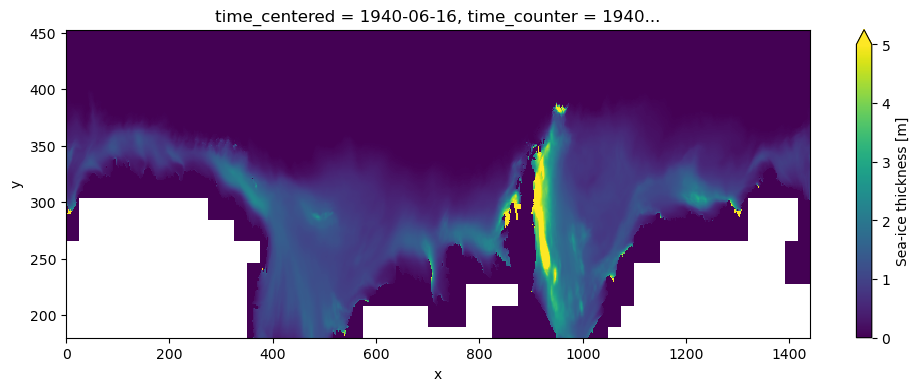

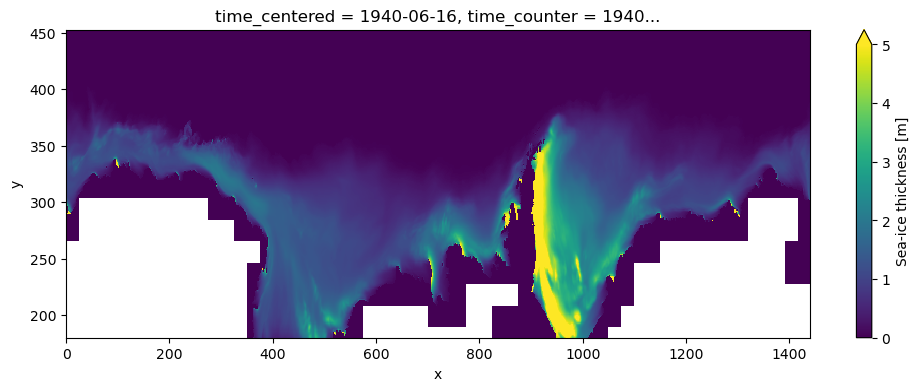

In [20]:
ds_angle['sithic'].isel(time_counter=5).plot(figsize=(12,4), vmin=0, vmax=5, ylim=(180,None))
ds_hammer['sithic'].isel(time_counter=5).plot(figsize=(12,4), vmin=0, vmax=5, ylim=(180,None))

Text(0.5, 1.0, 'CESM2 w loads of iceberg melt')

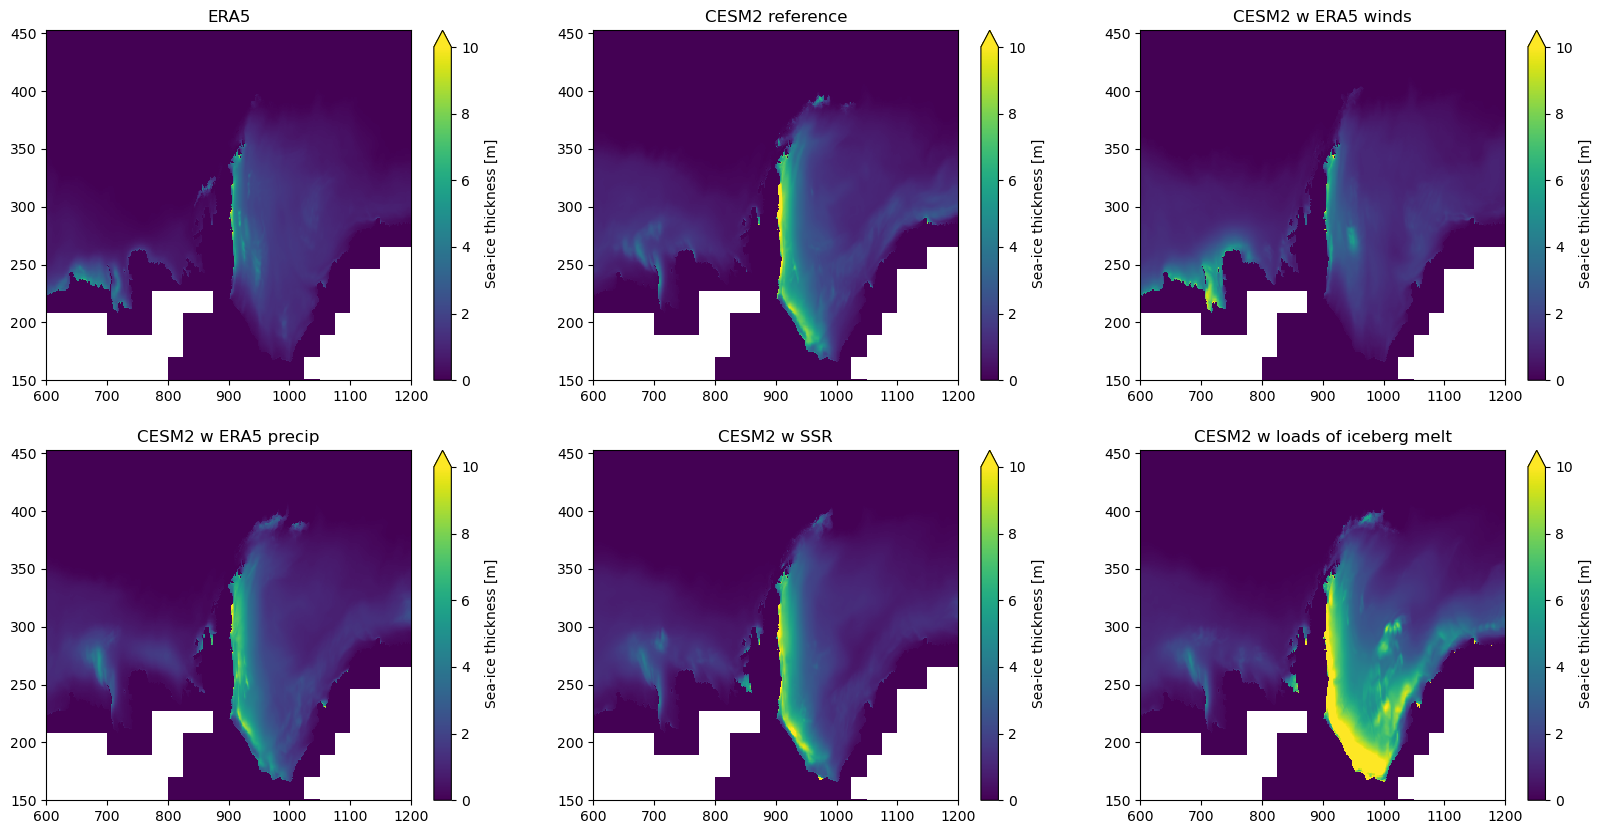

In [13]:
var='sithic'
kwags = {'vmin':0, 'vmax':10}
fig, ax =plt.subplots(2,3, figsize=(20,10))
ds_era[var].isel(time_counter=5).plot(ax=ax[0,0], **kwags)
ds_ref[var].isel(time_counter=5).plot(ax=ax[0,1], **kwags)
ds_wnd[var].isel(time_counter=5).plot(ax=ax[0,2], **kwags)
ds_ppt[var].isel(time_counter=5).plot(ax=ax[1,0], **kwags)
ds_ssr[var].isel(time_counter=5).plot(ax=ax[1,1], **kwags)
ds_rnf[var].isel(time_counter=5).plot(ax=ax[1,2], **kwags)

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('')
    axis.set_ylim(150,None)
    axis.set_xlim(600,1200)

ax[0,0].set_title('ERA5')
ax[0,1].set_title('CESM2 reference')
ax[0,2].set_title('CESM2 w ERA5 winds')
ax[1,0].set_title('CESM2 w ERA5 precip')
ax[1,1].set_title('CESM2 w SSR')
ax[1,2].set_title('CESM2 w loads of iceberg melt')

Text(0.5, 1.0, 'CESM2 with monthly wind multiplier')

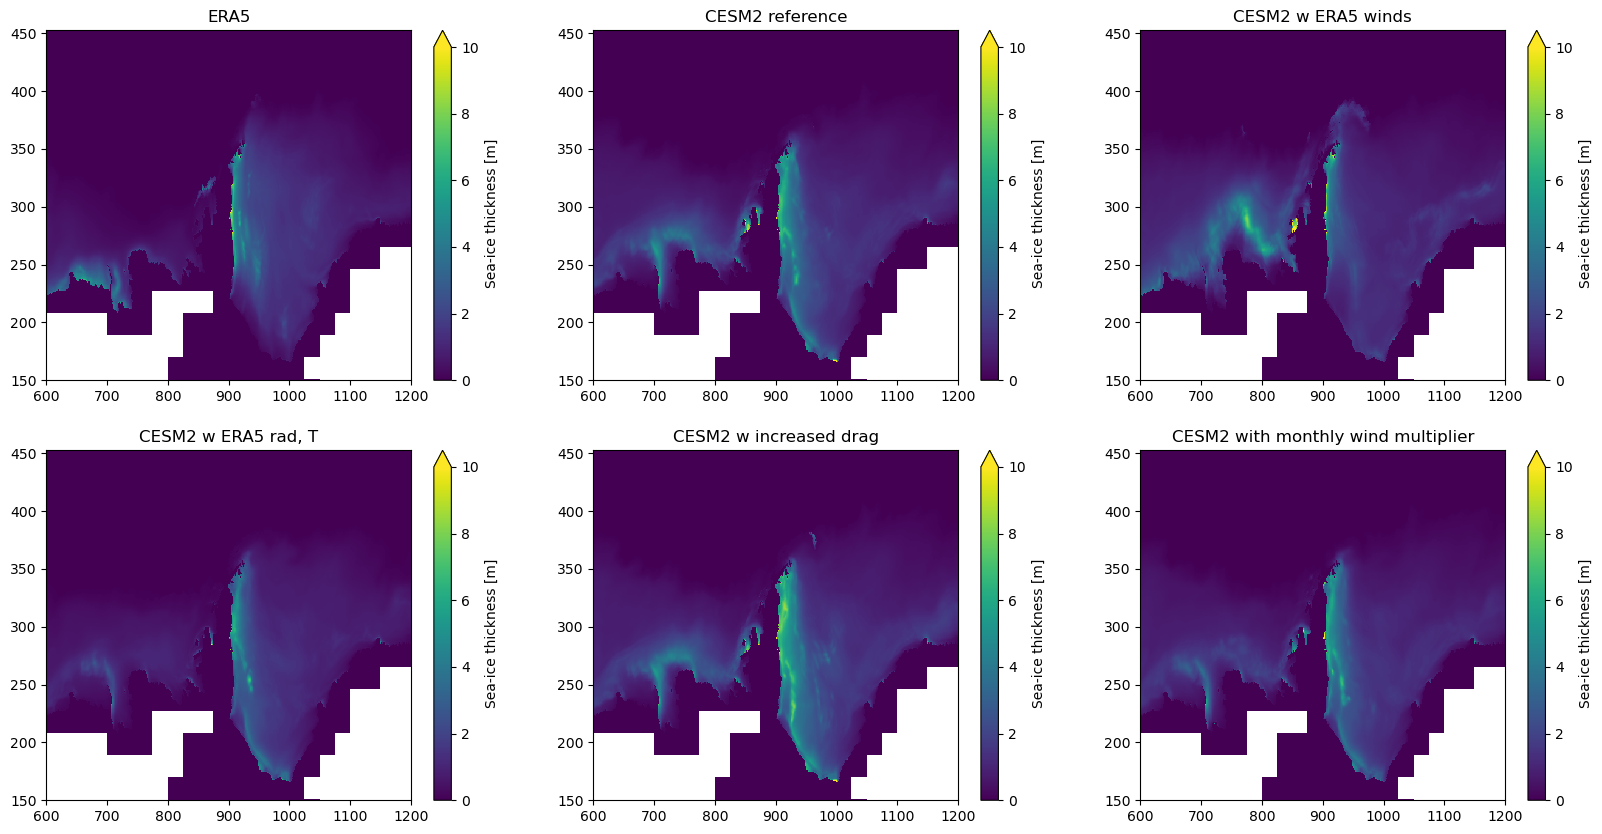

In [8]:
var='sithic'
kwags = {'vmin':0, 'vmax':10}
fig, ax =plt.subplots(2,3, figsize=(20,10))
ds_era[var].isel(time_counter=5).plot(ax=ax[0,0], **kwags)
ds_ref[var].isel(time_counter=5).plot(ax=ax[0,1], **kwags)
ds_wnd[var].isel(time_counter=5).plot(ax=ax[0,2], **kwags)
ds_rad[var].isel(time_counter=5).plot(ax=ax[1,0], **kwags)
ds_cio[var].isel(time_counter=5).plot(ax=ax[1,1], **kwags)
ds_mth[var].isel(time_counter=5).plot(ax=ax[1,2], **kwags)

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('')
    axis.set_ylim(150,None)
    axis.set_xlim(600,1200)

ax[0,0].set_title('ERA5')
ax[0,1].set_title('CESM2 reference')
ax[0,2].set_title('CESM2 w ERA5 winds')
ax[1,0].set_title('CESM2 w ERA5 rad, T')
ax[1,1].set_title('CESM2 w increased drag')
ax[1,2].set_title('CESM2 with monthly wind multiplier')

### Quiver plots

In [3]:
import matplotlib.path as mpath
import matplotlib.colors as cl
import cartopy.crs as ccrs

In [4]:
def make_fig_circle(ax):
    # Add circular boundary
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    # Draw meridian lines with labels around circular boundary
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, xlocs=range(-180,171,30), ylocs=[], \
                      color='gray', alpha=0.5, linestyle='--', zorder=3)
    gl.xlabel_style = {'size': 8}
    # Draw concentric circles (but hide labels) for the parallels of the latitude
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, xlocs=[], ylocs=None, \
                    color='gray', alpha=0.5, linestyle='--', zorder=3)
    
    return ax

In [5]:
def subplot_quiver(fig, ax, ds, u, v, var='siconc', nemo_mesh=f'{base_dir}bathymetry/mesh_mask-20250715.nc', 
                   vmin=None, vmax=None, cmap='viridis', quiver_color='crimson', colorbar=True, quiver=True):
    
    subset  = {'x':slice(0,None,18), 'y':slice(0,None,14)}
    ds_mesh = xr.open_dataset(nemo_mesh)
    tmask   = ds_mesh.tmask.isel(time_counter=0, nav_lev=0)
    
    # Limit the map to -60 degrees latitude and below:
    ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
    ax = make_fig_circle(ax)
    ax.set_facecolor('gray')
    ax.pcolormesh(ds_mesh.nav_lon, ds_mesh.nav_lat, tmask.where(tmask==1), cmap=cl.ListedColormap(['white']), transform=ccrs.PlateCarree())
    
    # Plot the data as usual
    cm = ax.pcolormesh(ds_mesh.nav_lon, ds_mesh.nav_lat, ds, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=cmap)
    if colorbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.8, 0.17, 0.02, 0.25])
        try:
            cb = fig.colorbar(cm, cax=cbar_ax, label=ds.long_name, extend='both')
        except:
            cb = fig.colorbar(cm, cax=cbar_ax, label=var, extend='both')
        cb.ax.tick_params(labelsize=8)    

    # add quiver arrows
    if quiver:
        ql = ax.quiver(ds_mesh.nav_lon.isel(**subset).values, ds_mesh.nav_lat.isel(**subset).values, u.isel(**subset).values, v.isel(**subset).values, 
                       transform=ccrs.PlateCarree(), headlength=2, headwidth=3, headaxislength=2.5,  width=2.5e-3, scale=2, color=quiver_color)
        ax.quiverkey(ql, 0.4, 0.48, 0.1, '0.1 m/s', labelpos='E', zorder=4)
    
    return

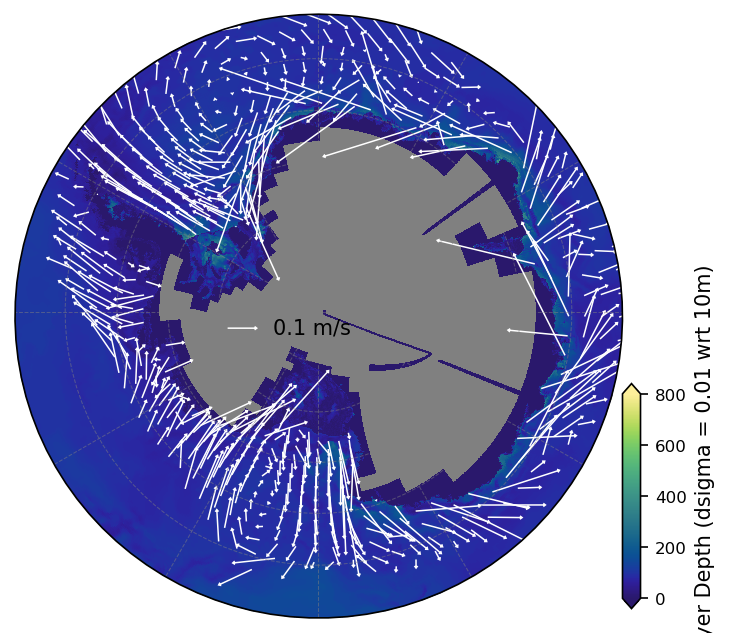

In [8]:
month=5
fig, ax = plt.subplots(1,1, figsize=(6,6), subplot_kw={'projection':ccrs.SouthPolarStereo()}, dpi=150)

u_rot, v_rot   = rotate_vector(dsi.isel(time_counter=month).sivelu, dsi.isel(time_counter=month).sivelv, domcfg, gtype='T', periodic=True, halo=False)
subplot_quiver(fig, ax, dsT.mldr10_1.isel(time_counter=month), 
               u_rot.where(dsi.siconc.isel(time_counter=month)>0.1), 
               v_rot.where(dsi.siconc.isel(time_counter=month)>0.1), var='mixed layer depth',
               vmin=0, vmax=800, cmap=cmocean.cm.haline, quiver_color='w')

# ax.set_title('ERA5 wind quiver')

In [6]:
def weddell_sea_quiver(fig, ax, ds, u, v, var='siconc', nemo_mesh=f'{base_dir}bathymetry/mesh_mask-20250715.nc', 
                       vmin=None, vmax=None, cmap='viridis', quiver_color='crimson', colorbar=True, quiver=True):

    clon=10
    
    subset  = {'x':slice(0,None,10), 'y':slice(0,None,10)}
    ds_mesh = xr.open_dataset(nemo_mesh)
    tmask   = ds_mesh.tmask.isel(time_counter=0, nav_lev=0)
    
    # Limit the map to -60 degrees latitude and below:
    ax.set_extent([-60, 30, -85, -58], ccrs.PlateCarree(central_longitude=clon))
    ax.set_facecolor('gray')
    ax.pcolormesh(ds_mesh.nav_lon, ds_mesh.nav_lat, tmask.where(tmask==1), cmap=cl.ListedColormap(['white']), transform=ccrs.PlateCarree(central_longitude=clon))
    
    # Plot the data as usual
    cm = ax.pcolormesh(ds_mesh.nav_lon, ds_mesh.nav_lat, ds, transform=ccrs.PlateCarree(central_longitude=clon), vmin=vmin, vmax=vmax, cmap=cmap)
    if colorbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.15])
        cb = fig.colorbar(cm, cax=cbar_ax, extend='both')
        cb.ax.set_title(f'{var}',fontsize=8)
        cb.ax.tick_params(labelsize=8)    

    # add quiver arrows
    if quiver:
        ql = ax.quiver(ds_mesh.nav_lon.isel(**subset).values, ds_mesh.nav_lat.isel(**subset).values, u.isel(**subset).values, v.isel(**subset).values, 
                       transform=ccrs.PlateCarree(central_longitude=clon), headlength=2, headwidth=3, headaxislength=2.5,  width=2.5e-3, scale=2, color=quiver_color)
        ax.quiverkey(ql, 0.6, 0.18, 0.05, '5 cm/s', labelpos='E', zorder=4)
    
    return

In [7]:
def annual_weddell(dsT, dsi, year):
    fig, ax = plt.subplots(4,3, figsize=(18,15), subplot_kw={'projection':ccrs.SouthPolarStereo()}, dpi=150)
    
    for m, axis in enumerate(ax.ravel()):
    
        if m==2:
            colorbar=True
        else:
            colorbar=False
        u_rot, v_rot   = rotate_vector(dsi.isel(time_counter=m).sivelu, dsi.isel(time_counter=m).sivelv, domcfg, gtype='T', periodic=True, halo=False)
        weddell_sea_quiver(fig, axis, dsT.mldr10_1.isel(time_counter=m).where(mesh_mask.misf != 0), 
                           u_rot.where(dsi.siconc.isel(time_counter=m)>0.1), 
                           v_rot.where(dsi.siconc.isel(time_counter=m)>0.1), var='mixed layer depth',
                           vmin=0, vmax=600, cmap=cmocean.cm.haline, quiver_color='w', colorbar=colorbar)
    
        axis.set_title(f'y{year}m{m+1:02}')
    
    return fig

In [ ]:
mesh_mask = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze().rename({'nav_lev':'deptht'})
domcfg =  xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20250715.nc').squeeze()

# exp_dir  = f'{base_dir}output/CESM2_t0_ens1011_monthly_3hwind_highresbias_efr020_monthlymulti_1920/'
exp_dir  = f'{base_dir}output/CESM2_t0_ens1011_monthly_3hwind_highresbias_efr005_monthlymulti_1920/'
# exp_dir  = f'{base_dir}output/ERA5_1h_tune0_efr005/'

for year in range(1922, 1928):
    dictionary = {'x_grid_T':'x','y_grid_T':'y', 'x_grid_T_inner':'x','y_grid_T_inner':'y'}
    dsT  = xr.open_dataset(f'{exp_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc').rename(dictionary)
    dsi  = xr.open_dataset(f'{exp_dir}files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')

    fig = annual_weddell(dsT, dsi, year)
    fig.savefig(f'{exp_dir}figures0/Weddell_Sea_ice_drift_y{year}.jpg')